<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day3_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Classifier**

#Core Concepts of Image Classification

**What is Image Classification?**

At its simplest, image classification is teaching a computer to recognize what's in an image. The computer learns to answer "What object is in this picture?" by assigning a label from predefined categories.

**How Images are Represented**

*   Computers see images as arrays of pixel values (numbers)
*   A color image is typically represented as a 3D array with dimensions:

    Height × Width × 3 channels (Red, Green, Blue)


*   Each pixel value ranges from 0-255, indicating color intensity






**The Classification Process**



1.  **Preprocessing:** Resize images to uniform dimensions, normalize pixel values (scale from 0-255 to 0-1)
2.   **Feature Extraction:** Identify important patterns in images (edges, textures, shapes)

1.   **Classification:** Determine which category the image belongs to based on these features






**Image Classification Metrics**



*   **Accuracy:** Overall percentage of correct predictions
*   **Precision:** Of all images predicted as class X, how many actually were class X
*   **Recall:** Of all actual class X images, how many were correctly identified
*   **Confusion Matrix:** Shows predictions vs. actual labels




cnn-architecture.svg

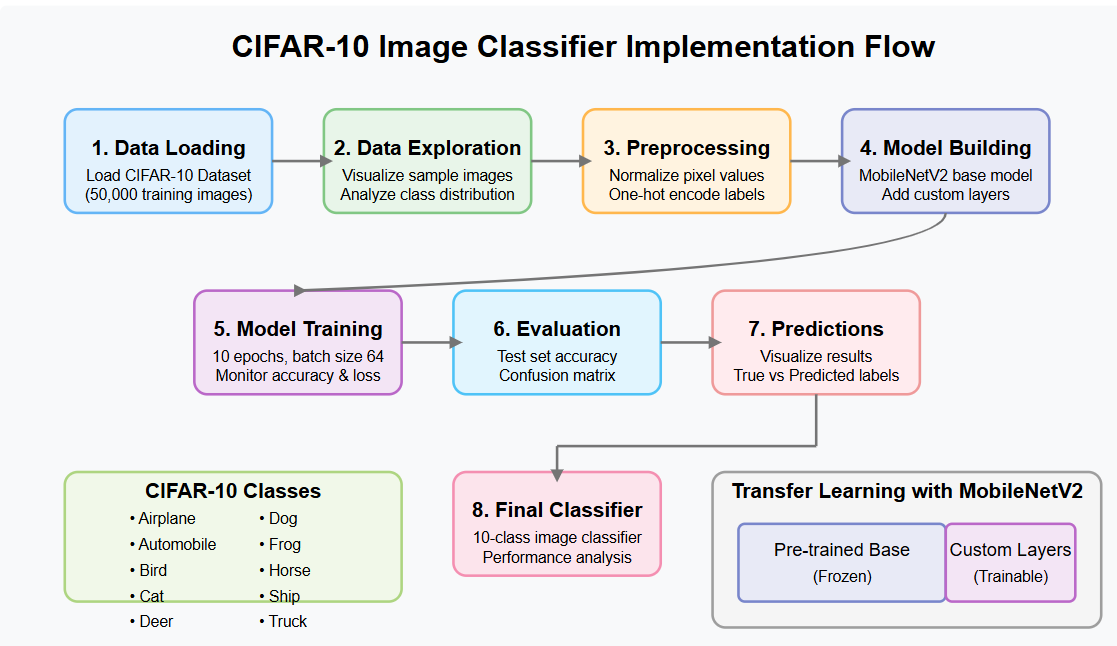

**Install and import necessary libraries**

In [ ]:
# Install necessary libraries
!pip install tensorflow matplotlib numpy

# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load and explore the CIFAR-10 dataset

**We using TensorFlow's built-in CIFAR-10 loader (easiest)**

In [ ]:
# Load CIFAR-10 directly from TensorFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**Explore the data**

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)


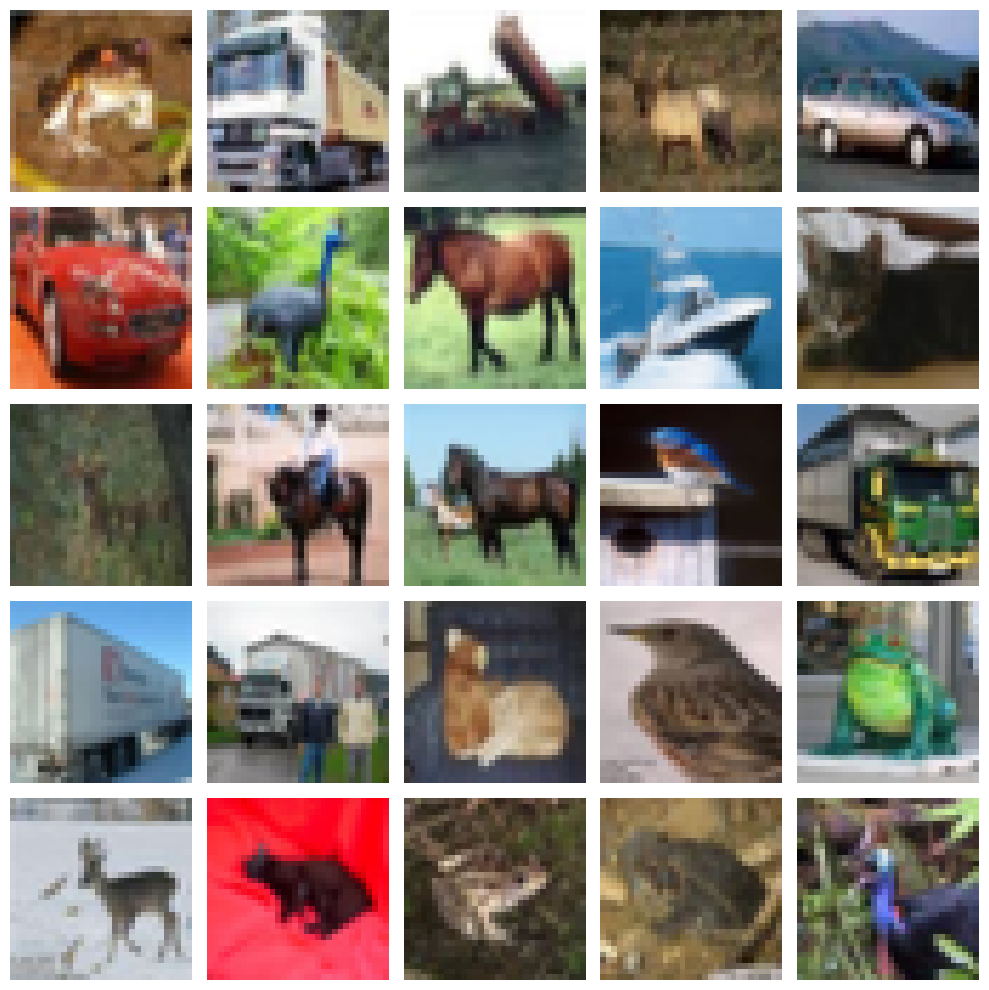

Airplane: 5000 images
Automobile: 5000 images
Bird: 5000 images
Cat: 5000 images
Deer: 5000 images
Dog: 5000 images
Frog: 5000 images
Horse: 5000 images
Ship: 5000 images
Truck: 5000 images


In [ ]:
# Print the shape of the training data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Define the class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Count examples per class
unique, counts = np.unique(y_train, return_counts=True)
for i, (label, count) in enumerate(zip(unique, counts)):
    print(f"{class_names[label]}: {count} images")

**Preprocess the data**

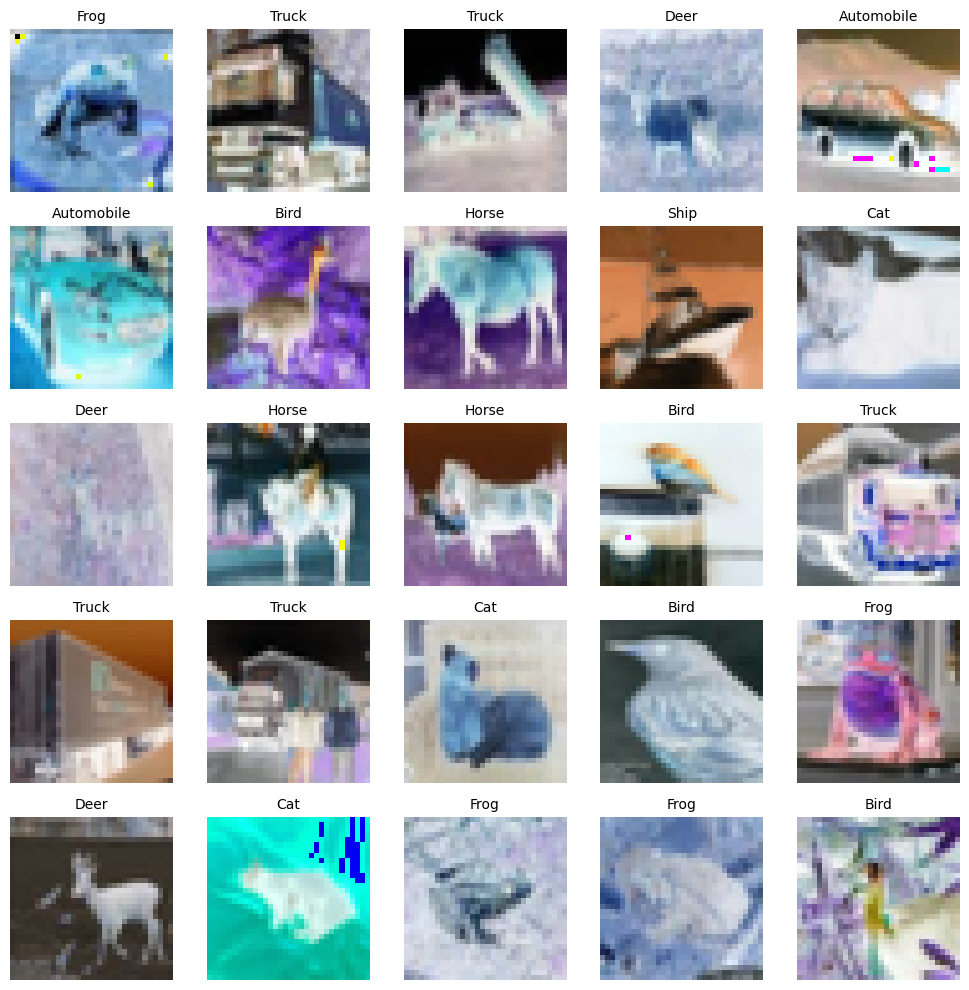

In [ ]:
# To visualize AFTER normalization, add this code:

# Create a figure to show sample images
plt.figure(figsize=(10, 10))
for i in range(25):  # Show 25 images in a 5x5 grid
    plt.subplot(5, 5, i+1)

    # Make a copy of the normalized image
    img_to_show = x_train[i].copy()

    # Scale back to 0-255 range ONLY for visualization
    # (keep your training data normalized)
    img_to_show = (img_to_show * 255).astype(np.uint8)

    # Display the properly scaled image
    plt.imshow(img_to_show)

    # Add label
    plt.title(class_names[y_train[i][0]], fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

**Let's Build your model using transfer learning**

In [ ]:
# For simplicity, we'll first try a smaller CNN for our 3 classes
# Later we can use transfer learning with a pre-trained model

# Load a pre-trained model without the top classification layer
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(32, 32, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model layers
base_model.trainable = False

# Create the new model
model = tf.keras.Sequential([
    # Use the pre-trained model
    base_model,

    # Add classification layers
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

<ipython-input-6-0204b6025f1b>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,588,490 (9.87 MB)

 Trainable params: 330,506 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 82ms/step - accuracy: 0.1777 - loss: 2.1992 - val_accuracy: 0.2295 - val_loss: 2.1015
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 79ms/step - accuracy: 0.2248 - loss: 2.0993 - val_accuracy: 0.2320 - val_loss: 2.0868
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.2346 - loss: 2.0864 - val_accuracy: 0.2302 - val_loss: 2.0785
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.2332 - loss: 2.0787 - val_accuracy: 0.2352 - val_loss: 2.0761
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.2381 - loss: 2.0735 - val_accuracy: 0.2359 - val_loss: 2.0715
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.2343 - loss: 2.0665 - val_accuracy: 0.2369 - val_loss: 2.0698
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 76ms/step - accuracy: 0.2395 - loss: 2.0633 - val_accuracy: 0.2335 - val_loss: 2.0697
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.2373 - loss: 2.0555 - 

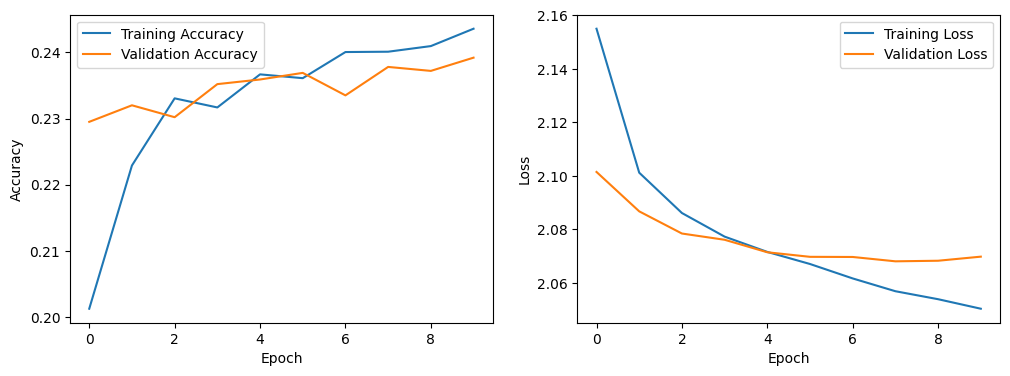

In [ ]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)  # 10 classes for CIFAR-10

# Train the model
history = model.fit(
    x_train, y_train_one_hot,
    epochs=10,  # Start with fewer epochs
    batch_size=64,
    validation_split=0.2
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Let's Visualize some predictions**

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step


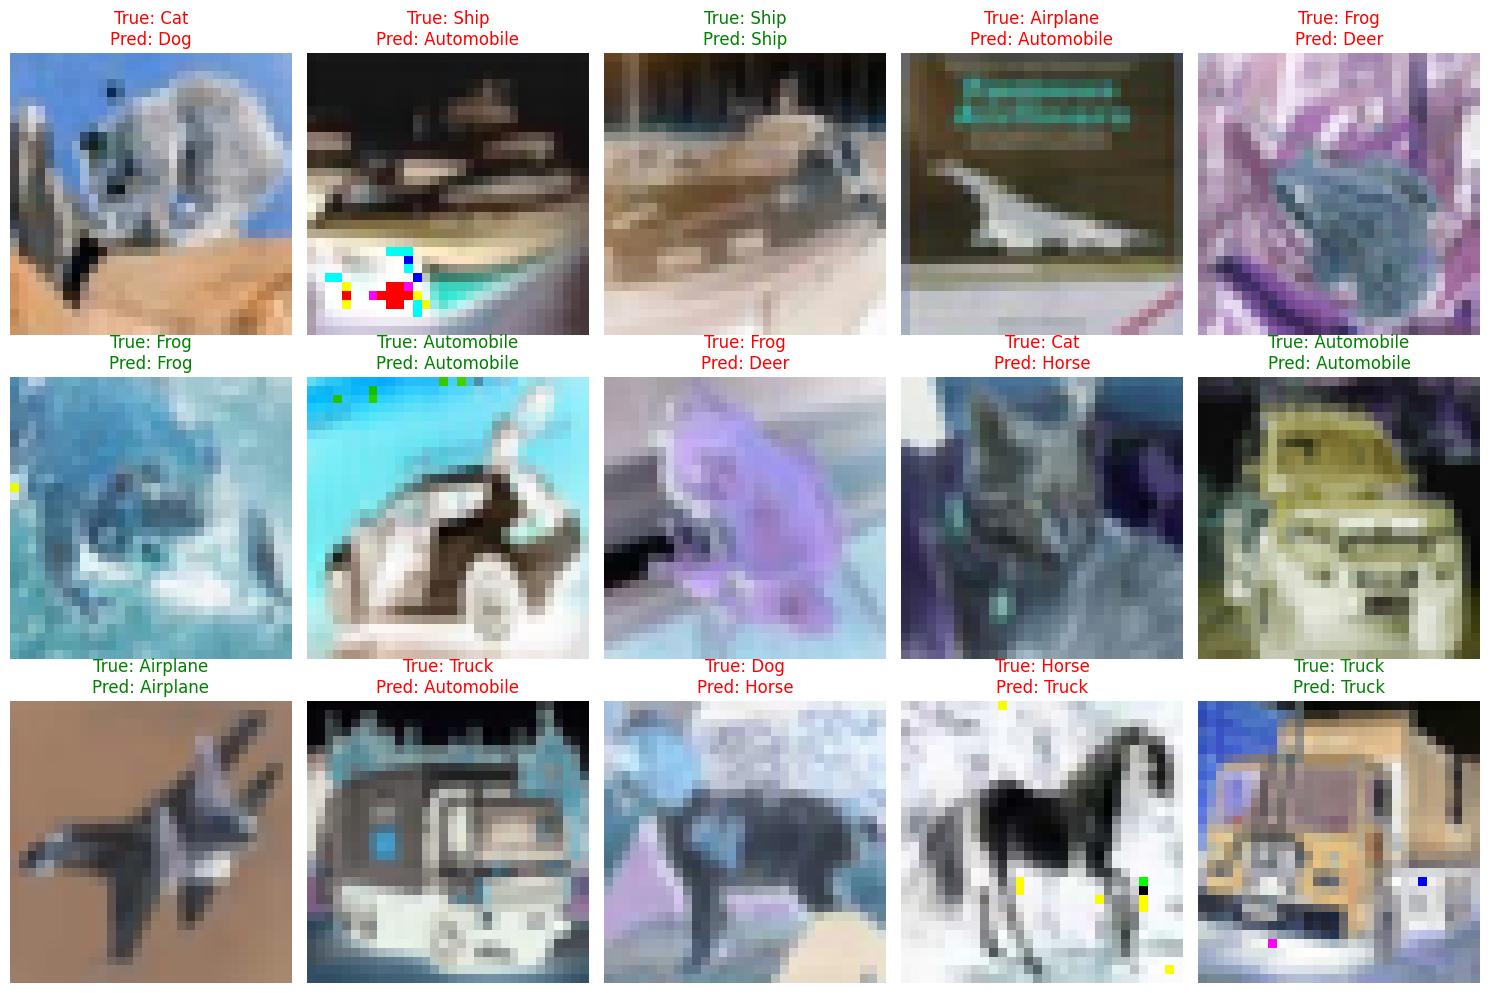

In [ ]:
# Define the class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Get the true classes from y_test
# y_test shape is (10000, 1) so we need to flatten it
true_classes = np.squeeze(y_test)

# Get the predicted classes
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Display test images with predictions
plt.figure(figsize=(15, 10))
for i in range(15):
    plt.subplot(3, 5, i+1)

    # Scale normalized images back to 0-255 for visualization
    img_to_show = (x_test[i] * 255).astype(np.uint8)
    plt.imshow(img_to_show)

    # Get labels
    true_label = class_names[true_classes[i]]
    pred_label = class_names[predicted_classes[i]]

    # Set color based on correctness
    color = 'green' if true_label == pred_label else 'red'

    # Set title with prediction info
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

**Reflect on results and ethics**

In [ ]:
# Check which classes are most often confused
misclassified = true_classes != predicted_classes
print("Number of misclassified images:", np.sum(misclassified))

# Look at class-specific accuracy
for i in range(10):
    class_mask = true_classes == i
    class_correct = np.sum((predicted_classes == i) & class_mask)
    class_total = np.sum(class_mask)
    print(f"{class_names[i]}: {class_correct}/{class_total} correct ({class_correct/class_total:.2%})")

Number of misclassified images: 7563
Airplane: 309/1000 correct (30.90%)
Automobile: 393/1000 correct (39.30%)
Bird: 23/1000 correct (2.30%)
Cat: 55/1000 correct (5.50%)
Deer: 393/1000 correct (39.30%)
Dog: 99/1000 correct (9.90%)
Frog: 218/1000 correct (21.80%)
Horse: 353/1000 correct (35.30%)
Ship: 339/1000 correct (33.90%)
Truck: 255/1000 correct (25.50%)


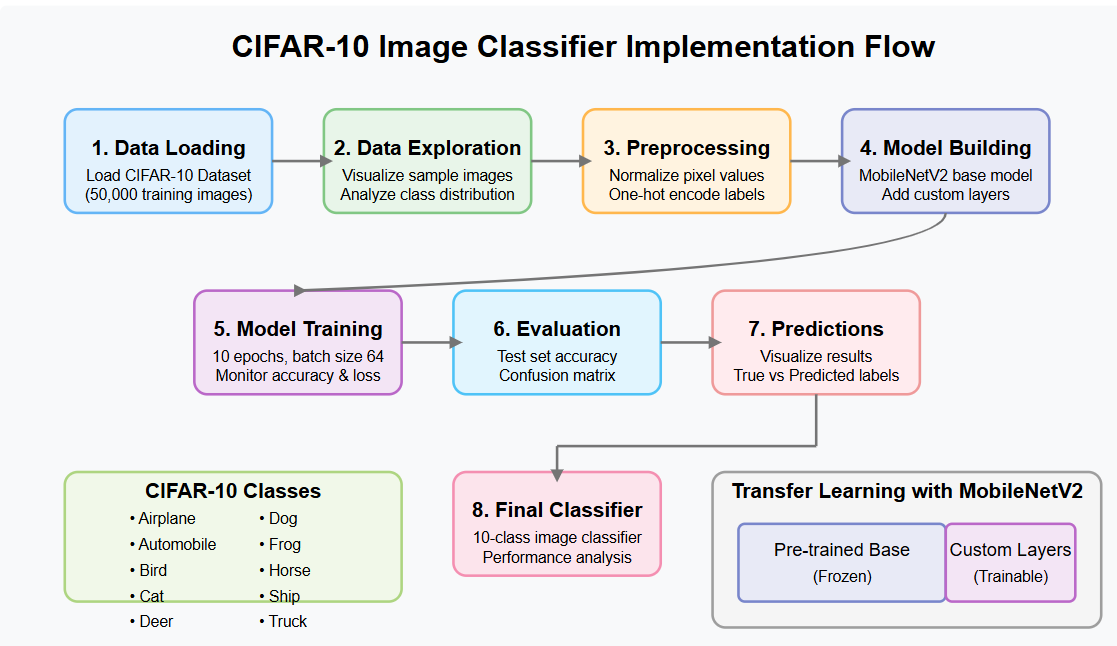